<a href="https://colab.research.google.com/github/cristobalperezp/MDS7104-Machine-Learning/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Tarea 2 - Aprendizaje de Máquinas
<h2 align="center">  Alumno: Cristóbal Pérez
<h3 align="center"> MDS7104-1 - Aprendizaje de Máquinas
<h3 align="center"> Otoño 2023

---

# Configuración Inicial:

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [49]:
seed = 20143826

In [50]:
! git clone 'https://github.com/cristobalperezp/MDS7104-Machine-Learning.git'

fatal: destination path 'MDS7104-Machine-Learning' already exists and is not an empty directory.


In [51]:
data = pd.read_csv('/content/MDS7104-Machine-Learning/CancerData.csv')

In [52]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [53]:
data.shape

(569, 33)

In [54]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [55]:
data['id'].duplicated().sum()

0

In [56]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,569.0,30371831.43,1.250206e+08,8670.00,869218.00,906024.00,8813129.00,9.113205e+08
radius_mean,569.0,14.13,3.520000e+00,6.98,11.70,13.37,15.78,2.811000e+01
texture_mean,569.0,19.29,4.300000e+00,9.71,16.17,18.84,21.80,3.928000e+01
perimeter_mean,569.0,91.97,2.430000e+01,43.79,75.17,86.24,104.10,1.885000e+02
area_mean,569.0,654.89,3.519100e+02,143.50,420.30,551.10,782.70,2.501000e+03
smoothness_mean,569.0,0.10,1.000000e-02,0.05,0.09,0.10,0.11,1.600000e-01
compactness_mean,569.0,0.10,5.000000e-02,0.02,0.06,0.09,0.13,3.500000e-01
concavity_mean,569.0,0.09,8.000000e-02,0.00,0.03,0.06,0.13,4.300000e-01
concave points_mean,569.0,0.05,4.000000e-02,0.00,0.02,0.03,0.07,2.000000e-01
symmetry_mean,569.0,0.18,3.000000e-02,0.11,0.16,0.18,0.20,3.000000e-01


In [57]:
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [58]:
X = data.loc[:,cols]
y = data.loc[:,'diagnosis']

In [59]:
y = y.apply(lambda x: 1 if x == 'M' else 0)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=seed,stratify=y)

In [61]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler
sc_c = StandardScaler()
X_train = pd.DataFrame(sc_c.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc_c.transform(X_test),columns=X_test.columns)

Text(0.5, 1.0, 'Distribución de Clases para diagnosis')

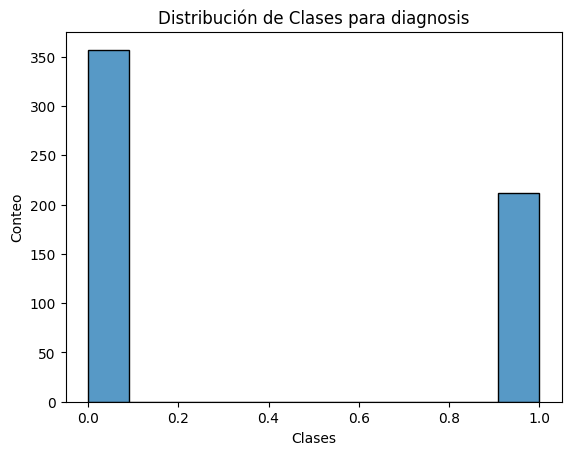

In [62]:
sns.histplot(y)
plt.xlabel("Clases")
plt.ylabel("Conteo")
plt.title("Distribución de Clases para diagnosis")

# 1. Árboles de decisión y Random Forest

## Pregunta a)

## Pregunta b)

In [63]:
cols = ['perimeter_worst', 'perimeter_mean']
X_train_b = X_train.copy()
X_test_b = X_test.copy()
X_train_b = X_train_b.loc[:,cols]
X_test_b = X_test_b.loc[:,cols]

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [65]:
dt = DecisionTreeClassifier(random_state=seed).fit(X_train_b,y_train)

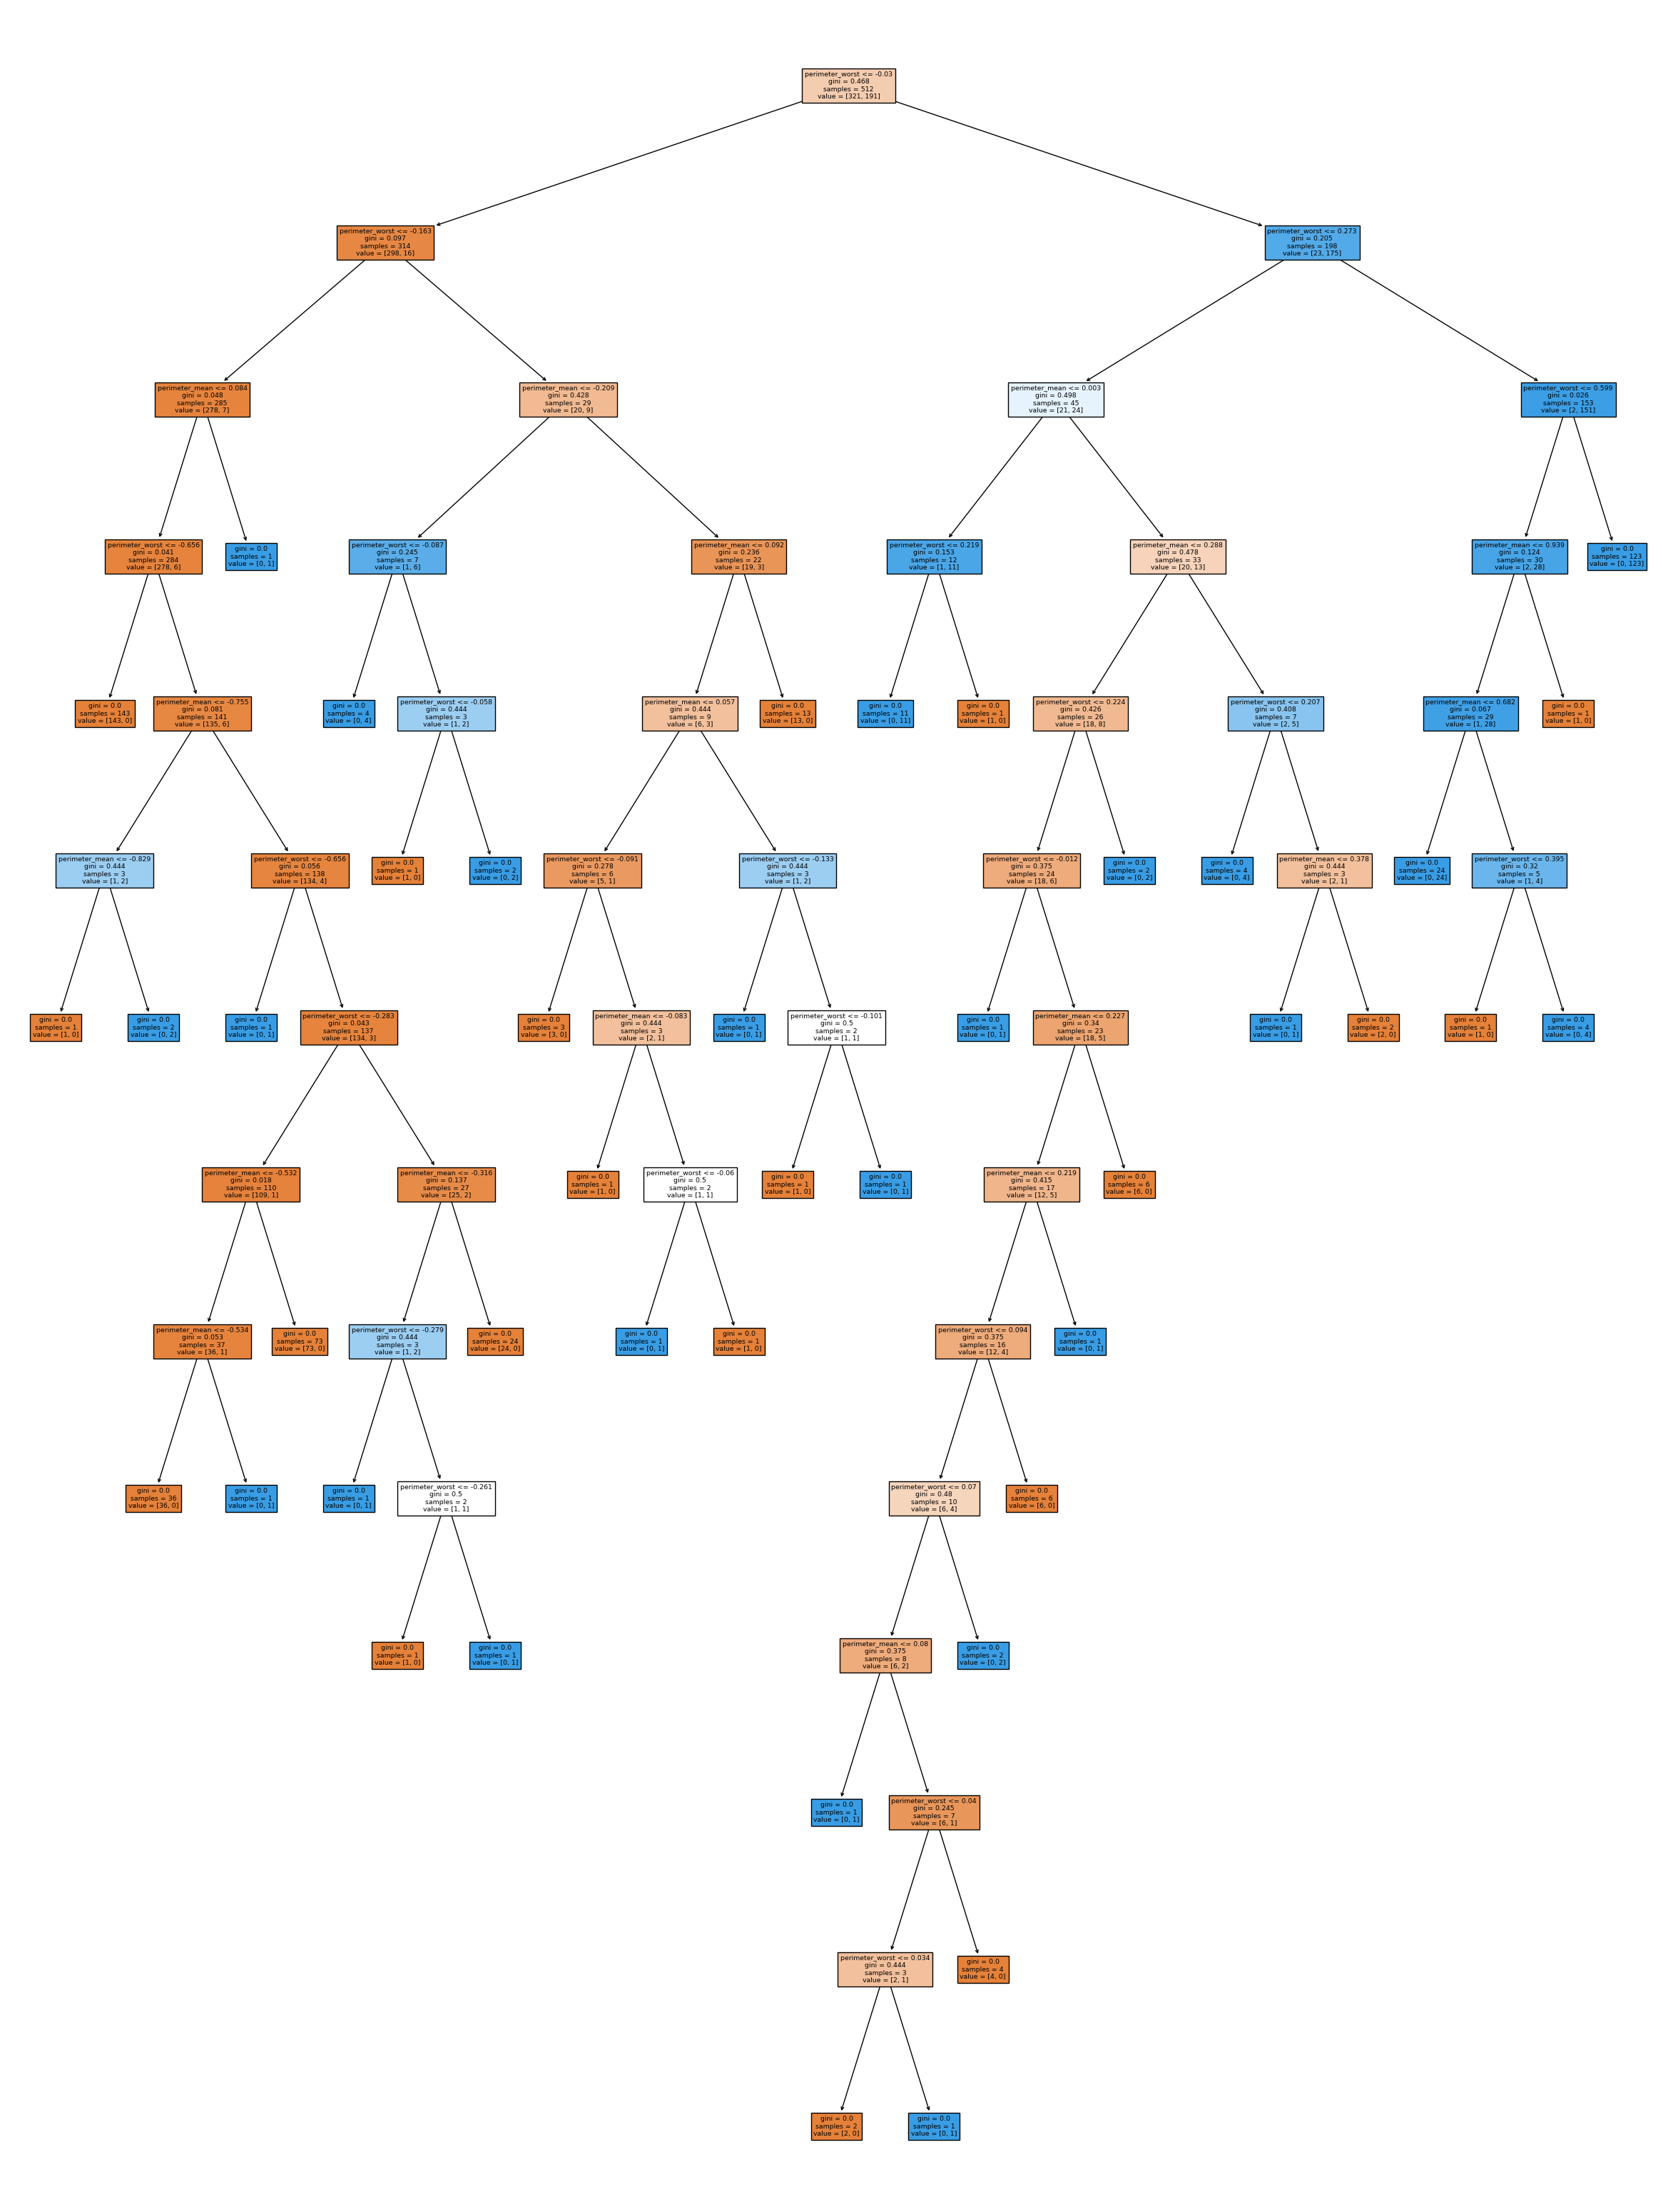

In [66]:
fig = plt.figure(figsize=(30,40))
_ = plot_tree(dt,feature_names=X_train_b.columns,filled=True)

In [67]:
y_pred_train = dt.predict(X_train_b)
y_pred_test = dt.predict(X_test_b)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
print('Train')
print('Accuracy: '+ str(accuracy_score(y_train, y_pred_train)))
print()
print('Test')
print('Accuracy: '+ str(accuracy_score(y_test, y_pred_test)))

Train
Accuracy: 1.0

Test
Accuracy: 0.8596491228070176


In [70]:
depth,nodes = [], []
ccp_alphas = np.logspace(-3, -1,100)

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha = ccp_alpha,random_state=seed)
    tree.fit(X_train_b, y_train)
    depth.append(tree.get_depth())
    nodes.append(tree.tree_.node_count)

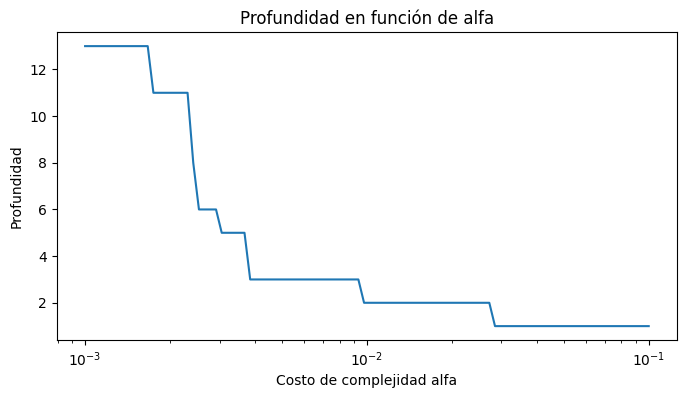

In [71]:
plt.figure(figsize = (8,4))
plt.title("Profundidad en función de alfa")
plt.xlabel("Costo de complejidad alfa")
plt.ylabel("Profundidad")
plt.plot(ccp_alphas, depth)
plt.xscale("log")

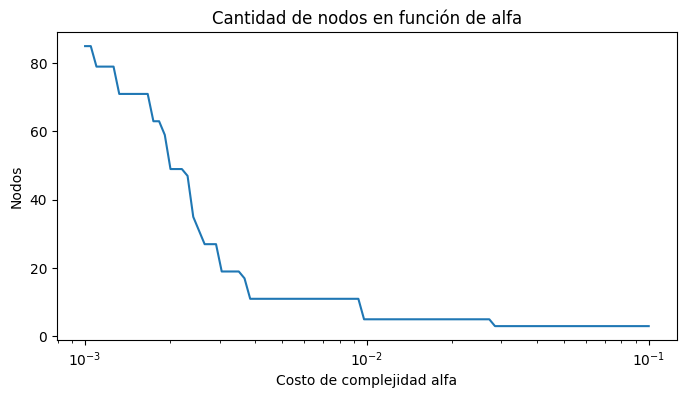

In [72]:
plt.figure(figsize = (8,4))
plt.title("Cantidad de nodos en función de alfa")
plt.xlabel("Costo de complejidad alfa")
plt.ylabel("Nodos")
plt.plot(ccp_alphas, nodes)
plt.xscale("log")

## Pregunta c)

Máximo Accuracy: 0.895 alcanzado con ccp_alpha = 0.0038535285937105275


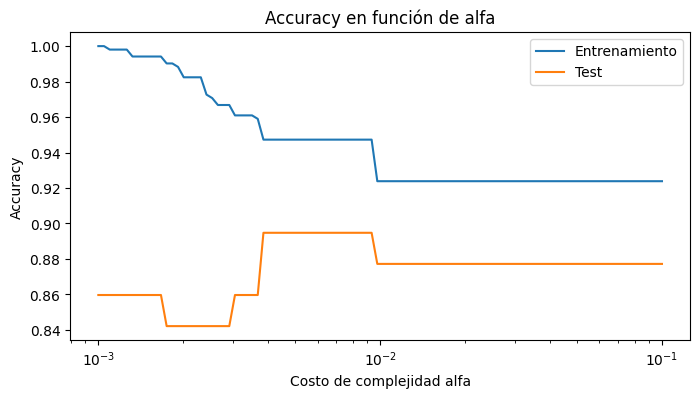

In [73]:
accuracy_train, accuracy_test = [], []
ccp_alphas = np.logspace(-3, -1,100)

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha = ccp_alpha,random_state=seed)
    tree.fit(X_train_b, y_train)
    accuracy_train.append(accuracy_score(y_train, tree.predict(X_train_b)))
    accuracy_test.append( accuracy_score(y_test,  tree.predict(X_test_b)))
    
plt.figure(figsize = (8,4))
plt.title("Accuracy en función de alfa")
plt.xlabel("Costo de complejidad alfa")
plt.ylabel("Accuracy")
plt.plot(ccp_alphas, accuracy_train, label="Entrenamiento")
plt.plot(ccp_alphas, accuracy_test, label ="Test")
plt.legend()
plt.xscale("log")

print(f"Máximo Accuracy: {max(accuracy_test):.3f} alcanzado con ccp_alpha = {ccp_alphas[np.argmax(accuracy_test)]}")

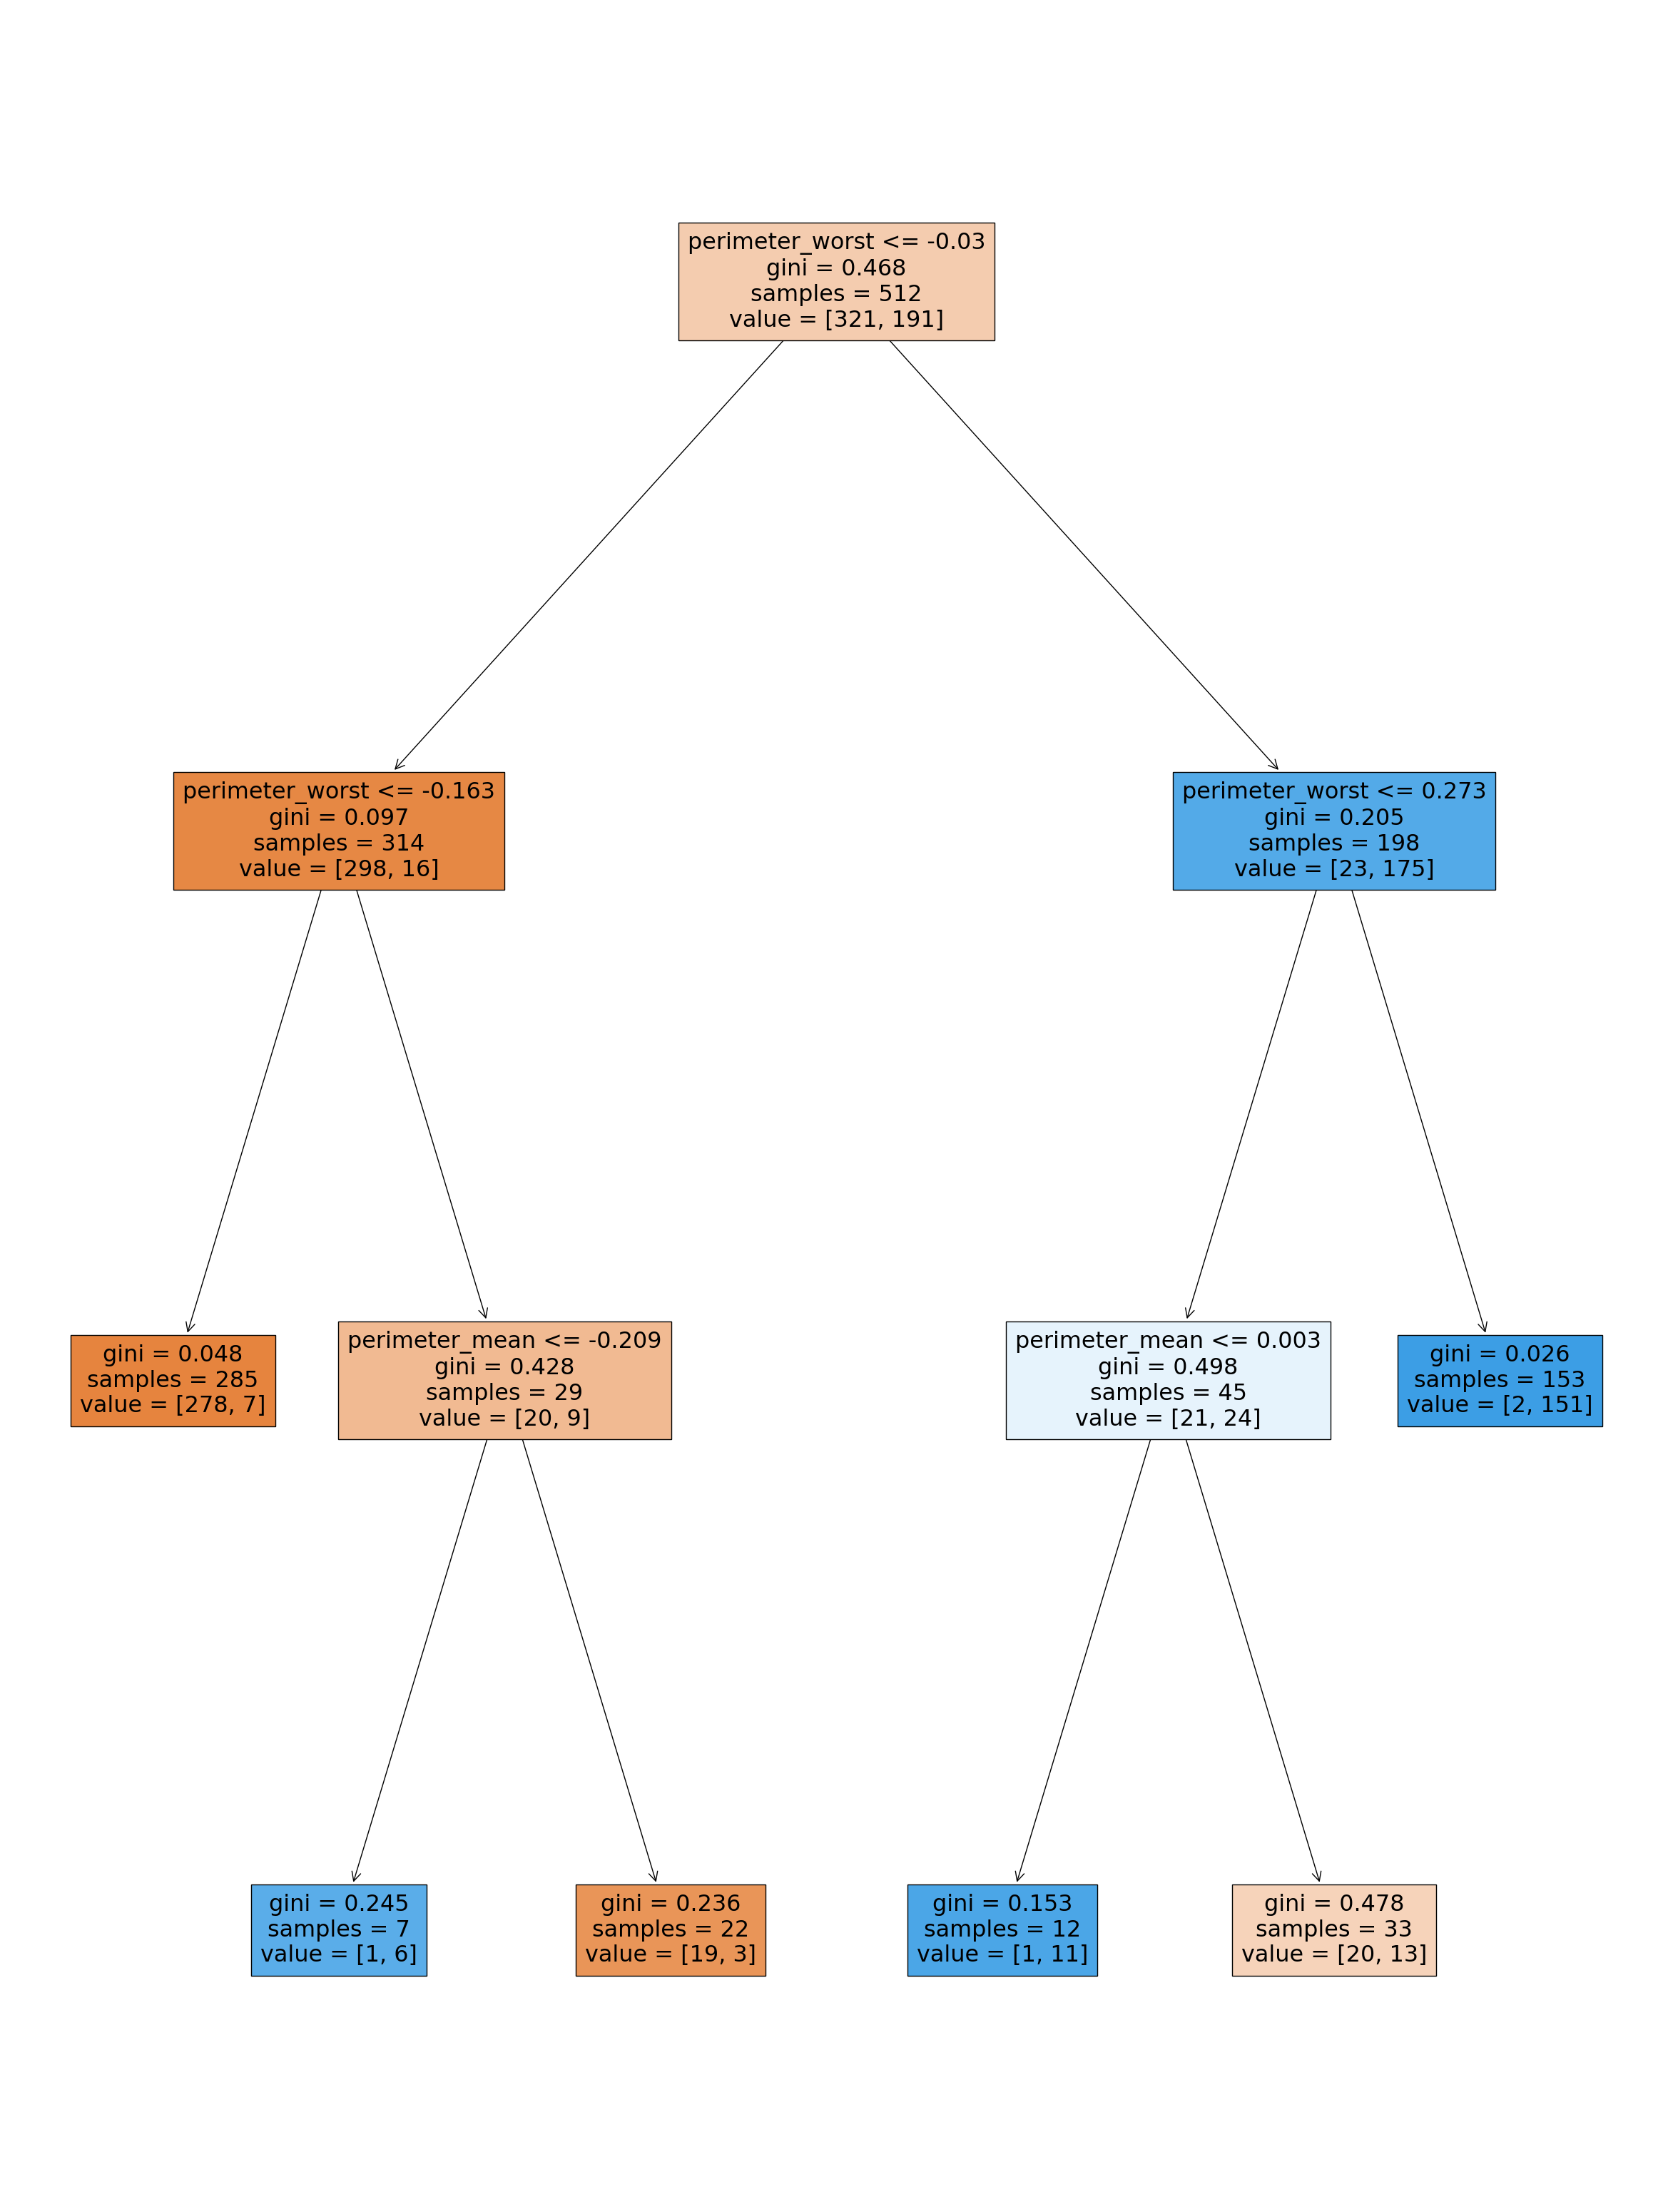

In [74]:
alpha = ccp_alphas[np.argmax(accuracy_test)]
opt_tree = DecisionTreeClassifier(ccp_alpha = alpha,
                                  random_state=seed).fit(X_train_b,y_train)

fig = plt.figure(figsize=(30,40))
_ = plot_tree(opt_tree,feature_names=X_train_b.columns,filled=True)

Conclusión

## Pregunta d)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
from sklearn.utils.validation import check_is_fitted

class BaggingClassifier:
    """Implementation of a Bagging classifier.

    BaggingClassifier is a classifier that uses the Bagging technique to combine
    multiple decision tree classifiers into a voting ensemble. Random samples with
    replacement are generated from the training dataset, and a decision tree
    classifier is trained on each sample. Final predictions are obtained by voting.

    Parameters:
    -----------
    n_estimators : int, optional (default=10)
        The number of decision tree classifiers in the ensemble.

    Attributes:
    -----------
    n_estimators : int
        The number of decision tree classifiers in the ensemble.
    estimators : list
        A list of the trained decision tree classifiers.

    Methods:
    --------
    fit(X, y):
        Fit the model using the training dataset X and target values y. Generate
        random samples with replacement and train a decision tree classifier on
        each sample. Return the trained BaggingClassifier object.

    predict(X):
        Perform predictions for the dataset X using the trained decision tree
        classifiers in the ensemble. Return the final predictions of the ensemble.

    """
    def __init__(self, n_estimators=10):
        """
        Initialize a BaggingClassifier object.

        Parameters:
        -----------
        n_estimators : int, optional (default=10)
            The number of decision tree classifiers in the ensemble.

        """
        self.n_estimators = n_estimators
        self.estimators = []

    def fit(self, X, y):
        """
        Fit the model using the training dataset X and target values y.

        Generate random samples with replacement from the training dataset and
        train a decision tree classifier on each sample. The trained classifiers
        are stored in the estimators list.

        Parameters:
        -----------
        X : array-like or sparse matrix, shape (n_samples, n_features)
            The training dataset.

        y : array-like, shape (n_samples,)
            The target values of the training dataset.

        Returns:
        --------
        self : BaggingClassifier
            Returns the trained BaggingClassifier object.

        """
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            # Generar una muestra aleatoria con reemplazo
            np.random.seed(seed)
            indices = np.random.randint(0, n_samples, size=n_samples)
            X_sample = X.iloc[indices].values
            y_sample = y.iloc[indices].values

            # Crear y entrenar el clasificador de árbol de decisión
            classifier = DecisionTreeClassifier(random_state=seed)
            classifier.fit(X_sample, y_sample)

            # Agregar el clasificador entrenado a la lista de estimadores
            self.estimators.append(classifier)

        return self

    def predict(self, X):
        """
        Predicts the target values for the dataset X using the trained
        decision tree classifiers in the ensemble.

        Parameters:
        -----------
        X : array-like or sparse matrix, shape (n_samples, n_features)
            The dataset for which to make predictions.

        Returns:
        --------
        predictions : array-like, shape (n_samples,)
            The final ensemble predictions.

        Raises:
        -------
        NotFittedError
            If the model has not been fitted.

        """
        # Verificar si el modelo ha sido ajustado
        check_is_fitted(self, 'estimators')

        predictions = np.zeros(X.shape[0])

        for i in range(self.n_estimators):
            # Realizar predicciones con cada clasificador
            predictions += self.estimators[i].predict(X.values)

        # Realizar votación y devolver las predicciones finales
        return np.round(predictions / self.n_estimators)

In [77]:
bagging_tree = BaggingClassifier().fit(X_train, y_train)

In [78]:
estimators = 10
rf = RandomForestClassifier(
    n_estimators = estimators,
    random_state = seed).fit(X_train, y_train)

In [79]:
print('Train')
print('-'*40)
print('BaggingClassifier')
print('Accuracy: '+ str(accuracy_score(y_train,bagging_tree.predict(X_train) )))
print()
print('RandomForestClassifier')
print('Accuracy: '+ str(accuracy_score(y_train,rf.predict(X_train) )))
print()
print('Test')
print('-'*40)
print('BaggingClassifier')
print('Accuracy: '+ str(accuracy_score(y_test,bagging_tree.predict(X_test) )))
print()
print('RandomForestClassifier')
print('Accuracy: '+ str(accuracy_score(y_test,rf.predict(X_test) )))

Train
----------------------------------------
BaggingClassifier
Accuracy: 0.9765625

RandomForestClassifier
Accuracy: 1.0

Test
----------------------------------------
BaggingClassifier
Accuracy: 0.9122807017543859

RandomForestClassifier
Accuracy: 0.9473684210526315


## Pregunta e)

[feature importance](https://explained.ai/rf-importance/#intro)

feature_importances_:

The impurity-based feature importances.

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.



Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits.

Lee, C. (2017, October 28). Feature Importance Measures for Tree Models — Part I. Medium. Recuperado el  30 de mayo de 2023, desde https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3

# 2. Support vector machines


## Pregunta a)

In [80]:
cols = ['perimeter_worst', 'perimeter_mean']
X_train_c = X_train.copy()
X_test_c = X_test.copy()
X_train_c = X_train_c.loc[:,cols]
X_test_c = X_test_c.loc[:,cols]

In [81]:
from sklearn.svm import SVC

In [82]:
#SVM lineal e implemente dicho modelo en función del hiperparámetro c.
def linear_softmargin_svc(X,y,C):
  clf = SVC(kernel='linear', C=C,random_state=seed).fit(X, y)
  return clf

In [83]:
vec_C = np.logspace(-7,-1,7)
norm_w = []
num_support_vectors = []

for C in vec_C:
    model = linear_softmargin_svc(X_train_c,y_train,C)
    norm_w.append(np.linalg.norm(model.coef_))
    num_support_vectors.append(np.sum(model.n_support_))

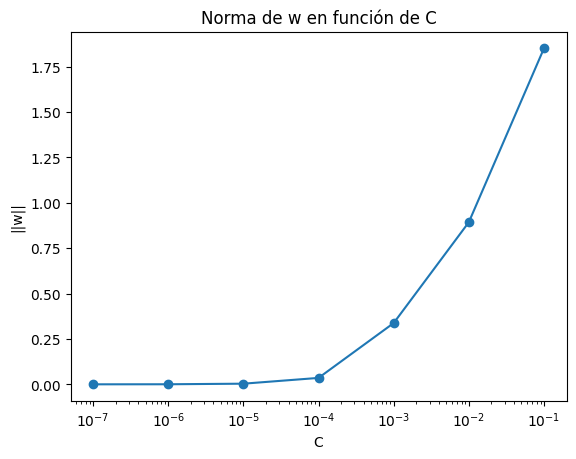

In [84]:
plt.plot(vec_C, norm_w, marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('||w||')
plt.title('Norma de w en función de C')
plt.show()

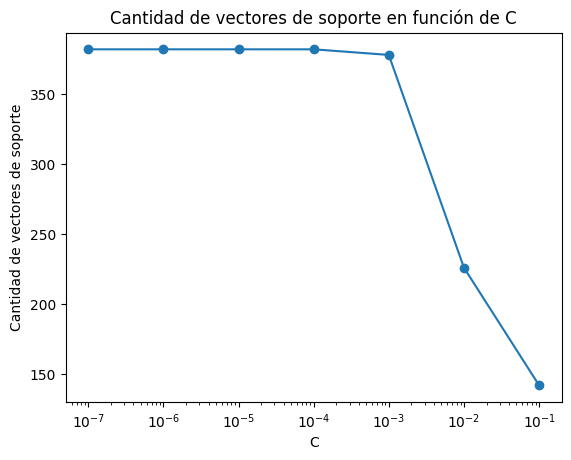

In [85]:
plt.plot(vec_C, num_support_vectors, marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cantidad de vectores de soporte')
plt.title('Cantidad de vectores de soporte en función de C')
plt.show()

## Pregunta b)

In [86]:
linear_svc = SVC(kernel='linear', C=1,probability=True,random_state=seed).fit(X_train_c,y_train)
poly_svc = SVC(kernel='poly', degree=2, coef0=1, gamma=1, C=1,probability=True,random_state=seed).fit(X_train_c,y_train)
rbf_svc = SVC(kernel='rbf', C=1,probability=True,random_state=seed).fit(X_train_c,y_train)

In [87]:
def make_meshgrid(X, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    x_min, x_max = X.to_numpy()[:, 0].min() - 1, X.to_numpy()[:, 0].max() + 1
    y_min, y_max = X.to_numpy()[:, 1].min() - 1, X.to_numpy()[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    return XX, YY


def plot_contours(X,y, model,tittle):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    params: dictionary of params to pass to contourf, optional
    """
    xx, yy = make_meshgrid(X)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plotear la región de decisión para cada modelo
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
    # Plotear los puntos de entrenamiento
    plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('perimeter_worst')
    plt.ylabel('perimeter_mean')
    plt.title('Frontera de decisión para: '+tittle)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


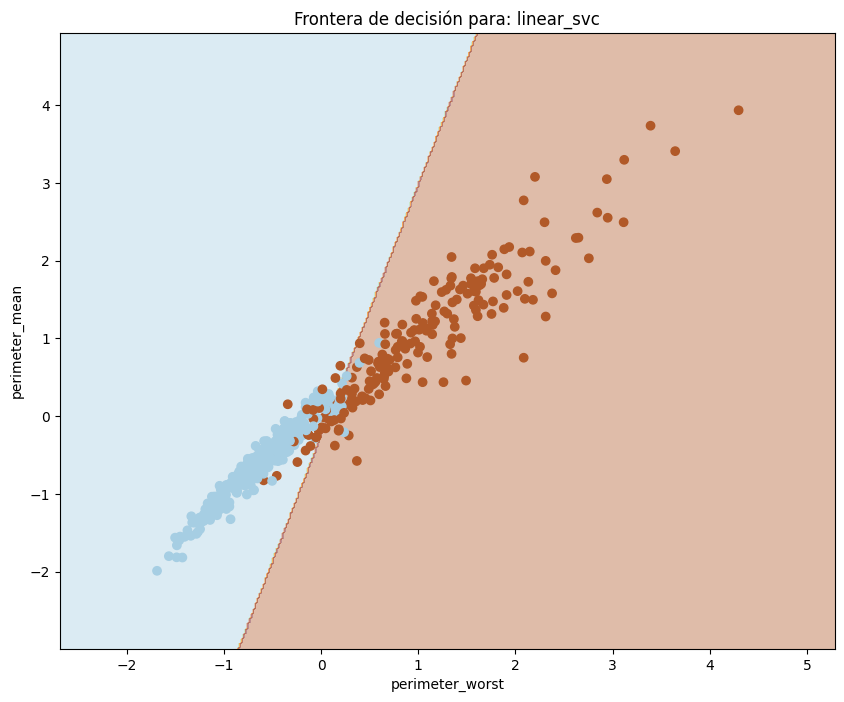

In [88]:
plot_contours(X_train_c,y_train,linear_svc,'linear_svc')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


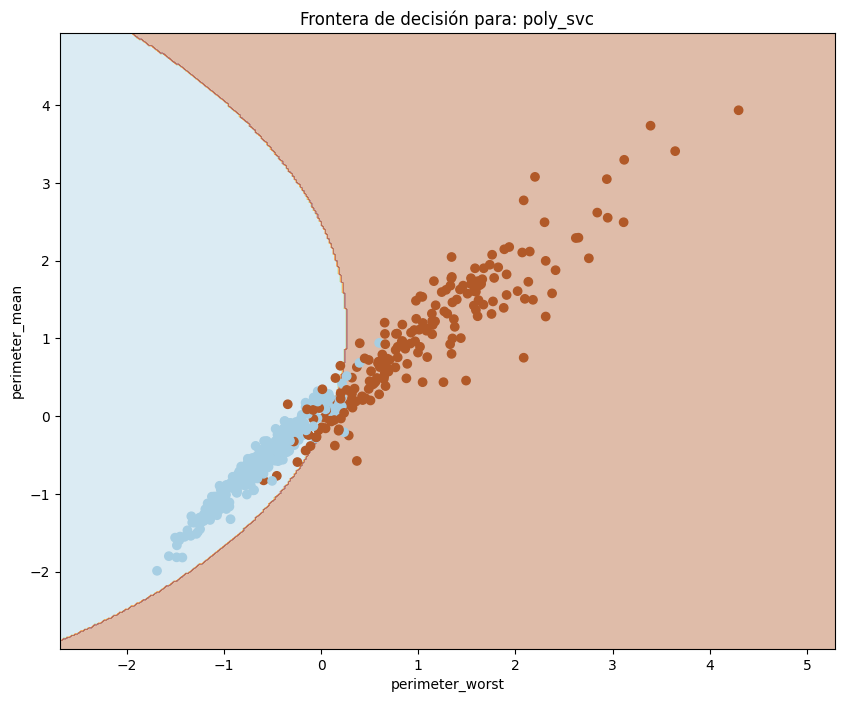

In [89]:
plot_contours(X_train_c,y_train,poly_svc,'poly_svc')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


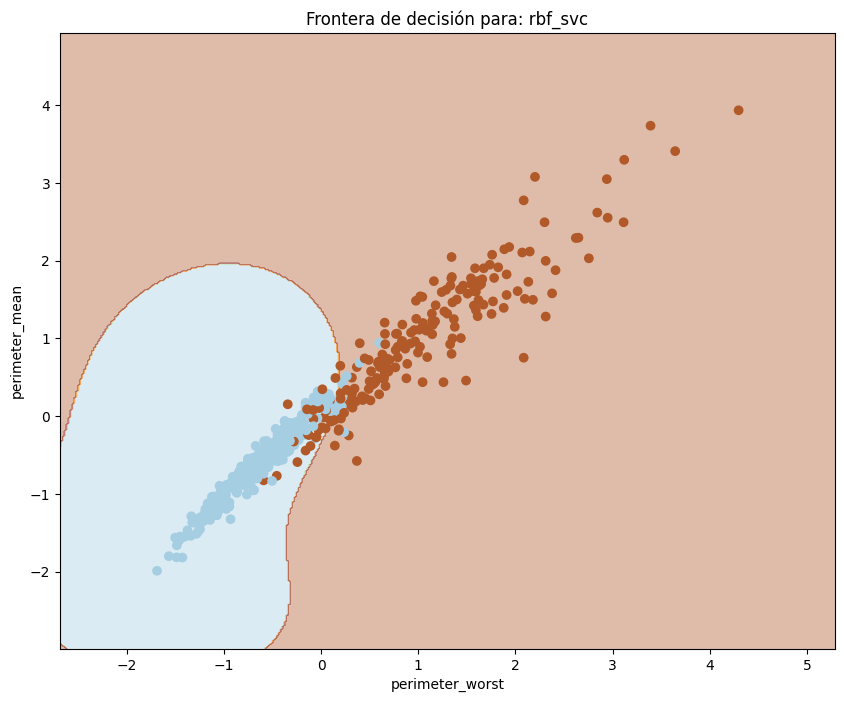

In [90]:
plot_contours(X_train_c,y_train,rbf_svc,'rbf_svc')

#3. Selección de modelos

## Pregunta a)

In [91]:
class ROCCurve:
    """Class for calculating and plotting the Receiver Operating Characteristic (ROC) curve.

    ROCCurve calculates the ROC curve for a given model and dataset. It takes the model, input
    features (X), and target labels (y) as input. The ROC curve is then calculated based on the
    predicted probabilities of the positive class. The curve can be plotted using the plot() method.

    Parameters:
    -----------
    model : object
        The trained classification model with a predict_proba() method.

    X : array-like or DataFrame, shape (n_samples, n_features)
        The input features.

    y : array-like or Series, shape (n_samples,)
        The target labels.

    Methods:
    --------
    calculate_roc():
        Calculates the ROC curve based on the predicted probabilities of the positive class.
        Returns the false positive rates (fpr) and true positive rates (tpr) as lists.

    plot(title):
        Plots the ROC curve with false positive rates (fpr) on the x-axis and true positive rates (tpr)
        on the y-axis. The title is displayed as the plot title.

    """
    def __init__(self, model, X, y):
        """
        Initialize an ROCCurve object.

        Parameters:
        -----------
        model : object
            The trained classification model with a predict_proba() method.

        X : array-like or DataFrame, shape (n_samples, n_features)
            The input features.

        y : array-like or Series, shape (n_samples,)
            The target labels.

        """
        self.model = model
        self.X = X
        self.y = y
        self.X = self.X.reset_index(drop=True)
        self.y = self.y.reset_index(drop=True)

    def calculate_roc(self):
        """
        Calculates the ROC curve based on the predicted probabilities of the positive class.

        Returns:
        --------
        fpr : list
            The false positive rates.

        tpr : list
            The true positive rates.

        """
        y_pred = self.model.predict_proba(self.X)[:, 1]

        # Ordenar las predicciones y los verdaderos valores de etiqueta en función de las predicciones
        sorted_indices = np.argsort(y_pred)
        y_pred = y_pred[sorted_indices]
        sorted_labels = self.y[sorted_indices]

        # Inicializar variables para calcular la curva ROC
        tpr = []  
        fpr = []
        # # Ejemplos positivos y negativos
        n_positives = sum(sorted_labels)
        n_negatives = len(sorted_labels) - n_positives

        # Calcular tp y fp
        for i in range(len(y_pred)):
            threshold = y_pred[i]
            tp = sum(sorted_labels[y_pred >= threshold])
            fp = sum(1 - sorted_labels[y_pred >= threshold])
            tpr.append(tp / n_positives)
            fpr.append(fp / n_positives)
        
        return fpr, tpr

    def plot(self, title):
        """
        Plots the ROC curve.

        Parameters:
        -----------
        title : str
            The title of the plot.

        """
        # Curva ROC
        fpr, tpr = self.calculate_roc()
        # Unimos al inicio
        fpr.append(0.0)
        tpr.append(0.0)

        # Plot
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.01])
        plt.xlabel('Tasa de falsos positivos')
        plt.ylabel('Tasa de verdaderos positivos')
        plt.title('Curva ROC - ' + title)
        plt.show()

## Pregunta b)

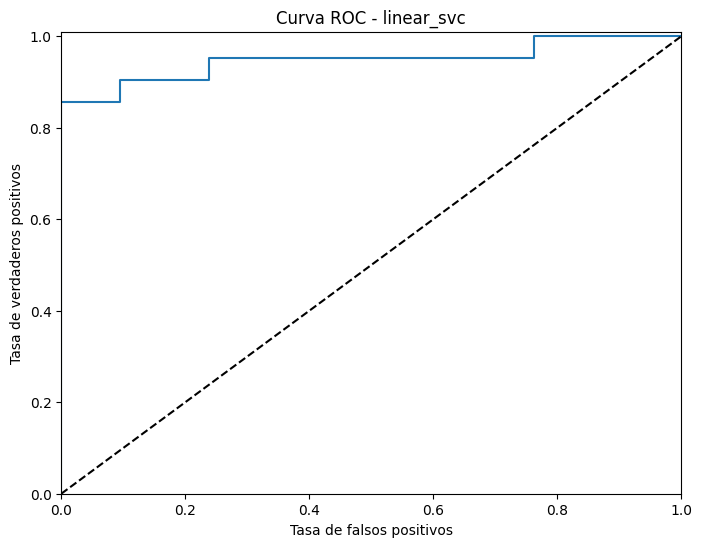

In [92]:
roc_curve = ROCCurve(linear_svc, X_test_c, y_test)
roc_curve.plot('linear_svc')

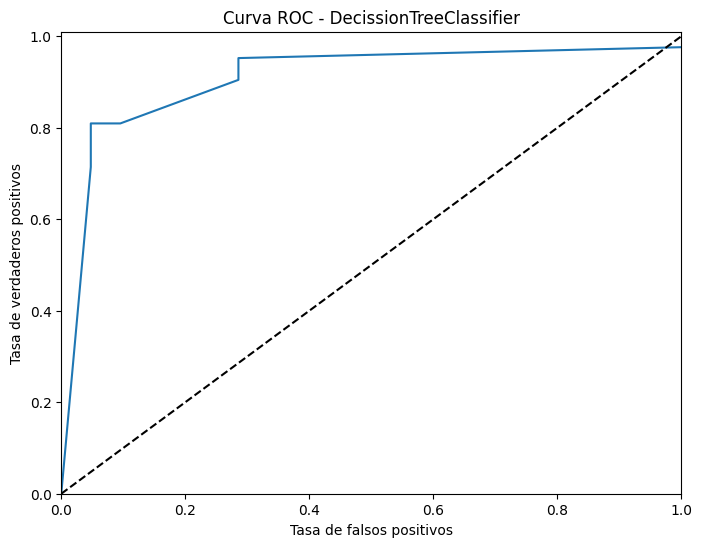

In [93]:
roc_curve = ROCCurve(opt_tree, X_test_b, y_test)
roc_curve.plot('DecissionTreeClassifier')

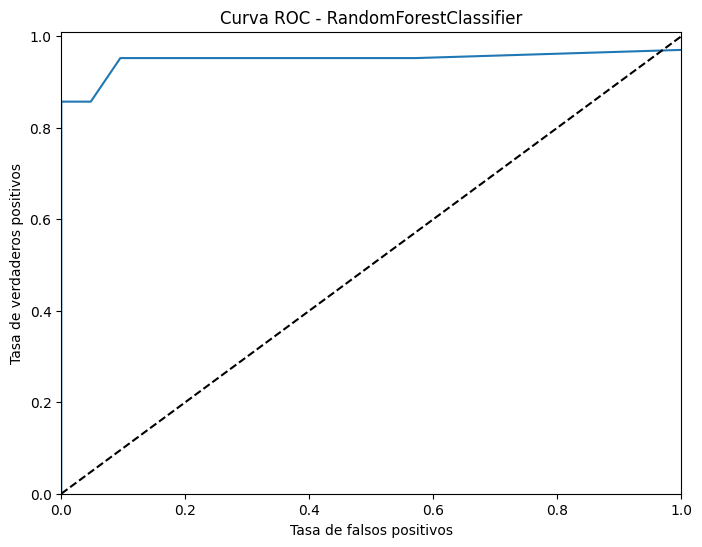

In [94]:
roc_curve = ROCCurve(rf, X_test, y_test)
roc_curve.plot('RandomForestClassifier')